In [1]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#X, Y = make_blobs(500, n_features=2, centers=4)
X, Y = make_classification(200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=4)

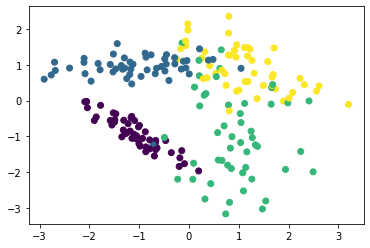

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [4]:
from sklearn.cluster import KMeans

km = KMeans(4)

In [5]:
km.fit(X)

KMeans(n_clusters=4)

In [6]:
km.inertia_

141.16521553204458

In [7]:
km.cluster_centers_

array([[ 0.8451681 , -1.78630797],
       [-1.04475457,  1.04393136],
       [ 1.11642307,  0.70390593],
       [-1.1591176 , -0.85028012]])

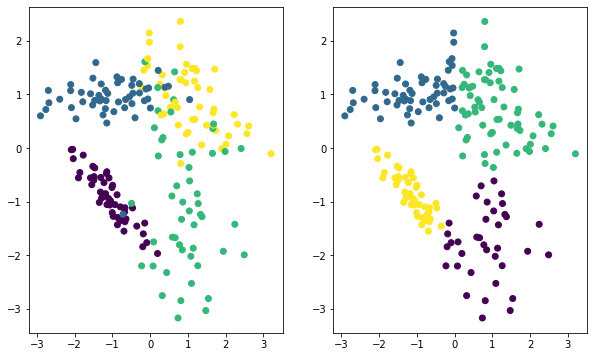

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=km.labels_)
plt.show()

In [9]:
from scipy.spatial import distance_matrix

class KMeans_local():
    
    def __init__(self, n_clusters = None):
        self.n_clusters = n_clusters
        self._i_clusters = []
        self._i_centroids = []
        self._i_inertia = []
    
    def fit(self, data, n_clust = None, init = 50):
        if n_clust:
            self.n_clusters = n_clust
        
        i_inertia = []
        
        for i in range(0, init):
            
            rand_indx = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        
            centroid_last = data[rand_indx]
            centroid_current = np.zeros((centroid_last.shape[0], centroid_last.shape[1]))
        
            diff = 100
            move = 0
        
            while diff > 0.00001:
                move += 1
            
                dist_centroid_to_data = distance_matrix(centroid_last, data)
                dist_min_clst = np.argmin(dist_centroid_to_data, axis=0)
                dist_min_value = np.ndarray.min(dist_centroid_to_data, axis=0)
            
                clst_ss = []
            
                for c in range(0, self.n_clusters):
                    centroid_current[c] = np.mean(data[dist_min_clst == c], axis=0)
                    clst_ss.append(np.sum(np.square(dist_min_value[dist_min_clst == c])))
                
            
                diff = np.sum(centroid_last - centroid_current) / self.n_clusters
                i_inertia = np.sum(clst_ss)
            
                centroid_last = centroid_current
        
            self._i_clusters.append(dist_min_clst)
            self._i_centroids.append(centroid_last)
            self._i_inertia.append(i_inertia)
        
        # Return best iteration
        best_iter = np.argmin(self._i_inertia)
        
        self.labels_ = self._i_clusters[best_iter]
        self.centroids_ = self._i_centroids[best_iter]
        self.inertia = self._i_inertia[best_iter]
        
        #print(f"Best iter: {best_iter} with inertia {self.inertia}")
        

In [10]:
km_local = KMeans_local()
km_local.fit(X, n_clust=4)

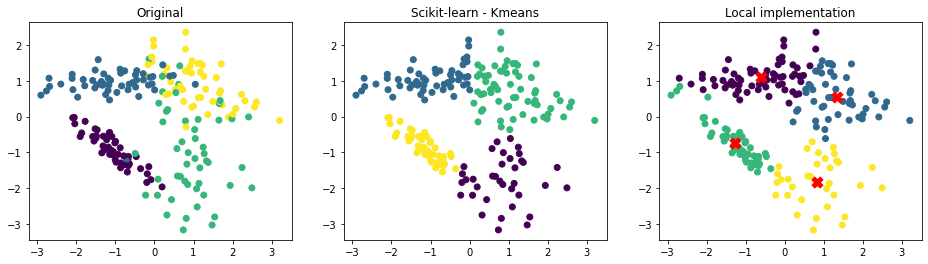

In [11]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.scatter(X[:,0], X[:,1], c=km.labels_)
plt.title('Scikit-learn - Kmeans')

plt.subplot(1, 3, 3)
plt.scatter(X[:,0], X[:,1], c=km_local.labels_)
plt.scatter(km_local.centroids_[:,0], km_local.centroids_[:,1], marker='X', s = 120, c = 'red')
plt.title('Local implementation')

plt.show()

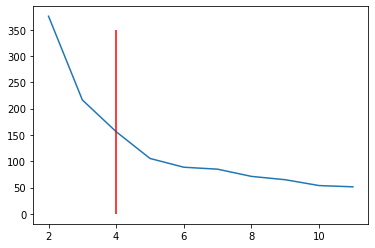

In [12]:
k_inertia = []
for k in range(2, 12):
    km_local = KMeans_local()
    km_local.fit(X, n_clust=k)
    
    k_inertia.append(km_local.inertia)

plt.plot(range(2, 12), k_inertia)
plt.vlines(x=4, color = 'red', ymax=350, ymin = 0)